In [1]:
# All modules/libraries needed
import pandas as pd 
import hashlib as hl
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('Data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [122]:
aus_data = df[df['NOC'] == 'AUS']
aus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7638 entries, 274 to 269946
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      7638 non-null   int64  
 1   Name    7638 non-null   object 
 2   Sex     7638 non-null   object 
 3   Age     7527 non-null   float64
 4   Height  6739 non-null   float64
 5   Weight  6637 non-null   float64
 6   Team    7638 non-null   object 
 7   NOC     7638 non-null   object 
 8   Games   7638 non-null   object 
 9   Year    7638 non-null   int64  
 10  Season  7638 non-null   object 
 11  City    7638 non-null   object 
 12  Sport   7638 non-null   object 
 13  Event   7638 non-null   object 
 14  Medal   1320 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 954.8+ KB


In [123]:
annonymous_name = aus_data['Name'].apply(lambda x: hl.sha256(x.encode()).hexdigest())

# Insert a new columns at index 1 on the table.
aus_data.insert(1, "Annonymous Name", annonymous_name)
aus_data.head(1)

,ID,Annonymous Name,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
274,143,efe5a201a9595bdc8178ffc88c322f06152be16616e0be...,"Desmond ""Des"" Abbott",M,21.0,184.0,87.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,Bronze


#### Visualisera de sporter landet fått flest medaljer i

We will visualize:
- Top 10 sports with most medals

In [89]:
# Group the sports and count resp. medals on each sport
grouped_sport = aus_data.groupby("Sport", observed=True)[["Medal"]]
medal_count = grouped_sport.count()
medal_count

,Medal
Sport,
Alpine Skiing,1
Alpinism,1
Archery,5
Art Competitions,0
Athletics,89
Badminton,0
Baseball,24
Basketball,60
Beach Volleyball,4


In [ ]:
sorted_medals = medal_count.sort_values(["Medal"], ascending=False)
filter_top_10_sports = sorted_medals[:10]
filter_top_10_sports

,Medal
Sport,
Swimming,401
Hockey,188
Rowing,144
Athletics,89
Cycling,84
Softball,60
Basketball,60
Sailing,53
Canoeing,41


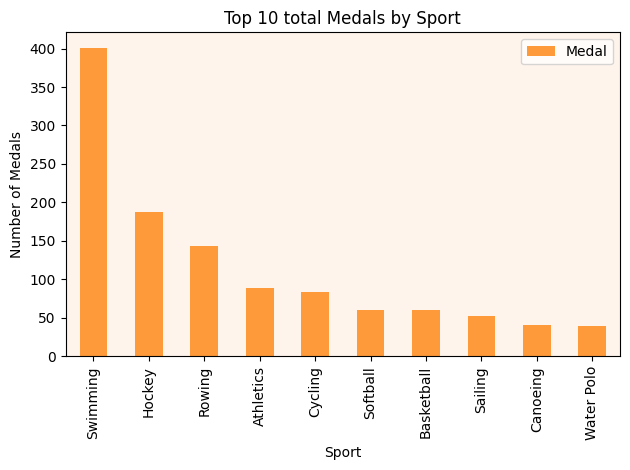

In [ ]:
filter_top_10_sports.plot(kind="bar", color="#FF9A3B")

plt.gca().set_facecolor("#FFF4EB")

plt.title("Top 10 total Medals by Sports")
plt.xlabel("Sports")
plt.ylabel("Number of Medals")
plt.legend()
plt.tight_layout()
plt.show()

#### Visualisera antal medaljer per OS

- There are some rows that has 'NaN' values that needs to process

In [16]:
aus_data.head()

,ID,Annonymous Name,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
274,143,efe5a201a9595bdc8178ffc88c322f06152be16616e0be...,"Desmond ""Des"" Abbott",M,21.0,184.0,87.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,Bronze
453,252,bdc95cf3064d791ef02fe88dcdf533ce6c5bf2d520f669...,Youcef Abdi,M,30.0,178.0,66.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
454,252,bdc95cf3064d791ef02fe88dcdf533ce6c5bf2d520f669...,Youcef Abdi,M,34.0,178.0,66.0,Australia,AUS,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
470,257,8615df199a983d8c9e81fac15ca8391214abe411d262ed...,Ali Abdo,M,19.0,169.0,74.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",NaN
471,257,8615df199a983d8c9e81fac15ca8391214abe411d262ed...,Ali Abdo,M,23.0,169.0,74.0,Australia,AUS,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN


In [91]:
# This part is just to visualize for better understanding the next cell
medals_df = aus_data.groupby(["Games", "Medal"]).size()
medals_df

Games        Medal 
1896 Summer  Bronze     1
             Gold       2
1900 Summer  Bronze     3
             Gold       3
1904 Summer  Bronze     1
                       ..
2014 Winter  Bronze     1
             Silver     2
2016 Summer  Bronze    25
             Gold      23
             Silver    34
Length: 82, dtype: int64

Source:
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
- https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

In [78]:
# unstack "Medal" index and convert it into columns
medals_per_os = aus_data.groupby(["Games", "Medal"]).size().unstack(level=1, fill_value=0)
# level 0 = "Games", level 1 = "Medal"
# fill_value=0 fills the rows with 0 if there are 'NaN'
medals_per_os.tail(11)

Medal,Bronze,Gold,Silver
Games,,,
1996 Summer,84,32,16
1998 Winter,1,0,0
2000 Summer,54,60,69
2002 Winter,0,2,0
2004 Summer,31,49,77
2006 Winter,1,1,0
2008 Summer,76,31,42
2010 Winter,0,2,1
2012 Summer,59,18,37


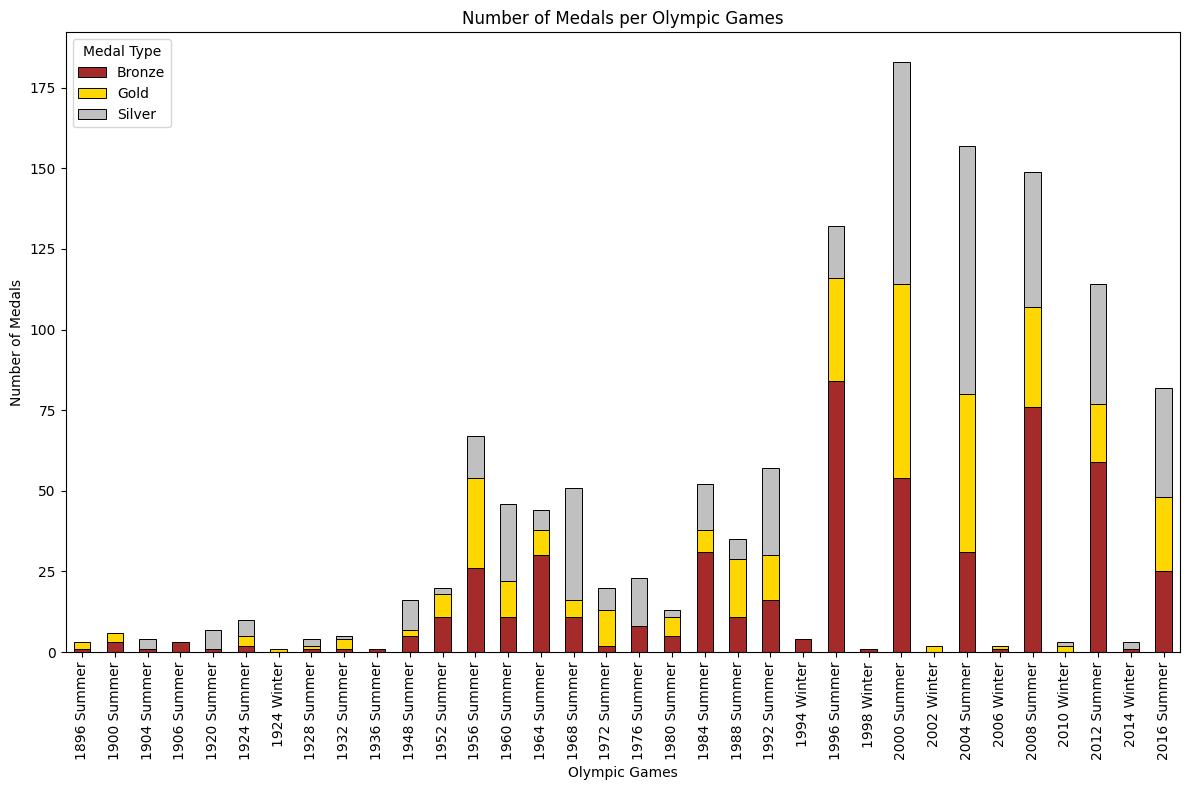

In [167]:
medals_per_os.plot(kind="bar", stacked=True, figsize=(12, 8), color=["brown", "gold", "silver"], edgecolor="black", linewidth=0.7)

plt.title("Number of Medals per Olympic Games")
plt.xlabel("Olympic Games")
plt.ylabel("Number of Medals")
plt.legend(loc="upper left", title="Medal Type", labels=["Bronze", "Gold", "Silver"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Visualisera histogram över åldrar

- There are some rows that has 'NaN' values that needs to process

In [112]:
aus_data.head() 

,ID,Annonymous Name,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
274,143,efe5a201a9595bdc8178ffc88c322f06152be16616e0be...,"Desmond ""Des"" Abbott",M,21.0,184.0,87.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,Bronze
453,252,bdc95cf3064d791ef02fe88dcdf533ce6c5bf2d520f669...,Youcef Abdi,M,30.0,178.0,66.0,Australia,AUS,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
454,252,bdc95cf3064d791ef02fe88dcdf533ce6c5bf2d520f669...,Youcef Abdi,M,34.0,178.0,66.0,Australia,AUS,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
470,257,8615df199a983d8c9e81fac15ca8391214abe411d262ed...,Ali Abdo,M,19.0,169.0,74.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",NaN
471,257,8615df199a983d8c9e81fac15ca8391214abe411d262ed...,Ali Abdo,M,23.0,169.0,74.0,Australia,AUS,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN


In [128]:
null_aus_data = aus_data["Age"].isnull().sum()
null_aus_data

np.int64(111)

In [133]:
processed_aus_data = aus_data.dropna(subset=["Age"])

In [ ]:
processed_aus_data["Age"].isnull().sum()

np.int64(0)

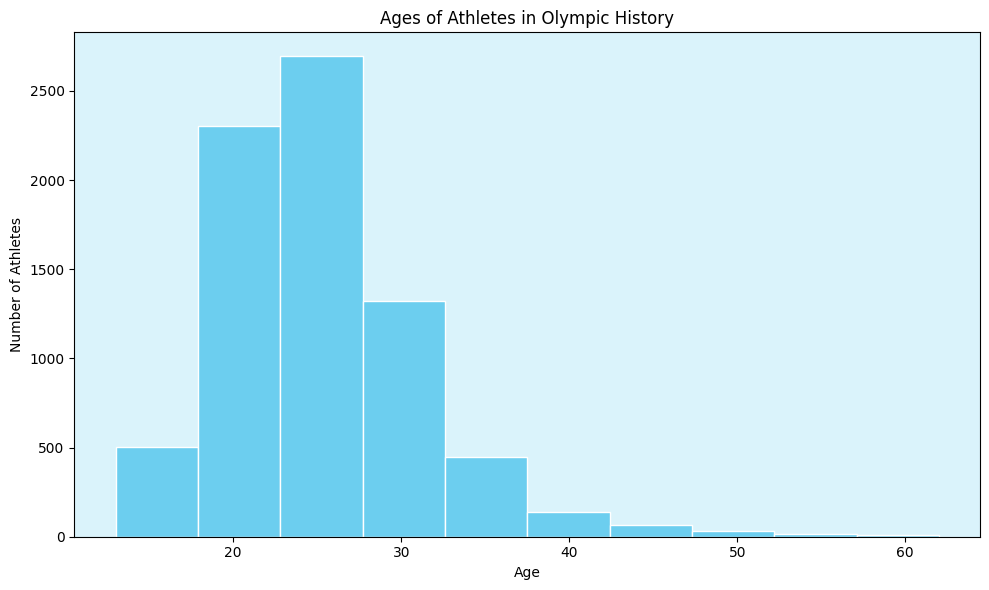

In [165]:
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor("#DAF3FB")

plt.hist(processed_aus_data["Age"], bins=10, color="#6CCEEF", edgecolor="#ffffff")
plt.title("Ages of Athletes in Olympic History")
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.tight_layout()
plt.show()